In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [217]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [219]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


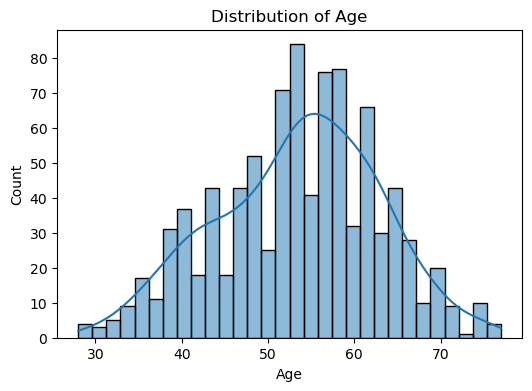

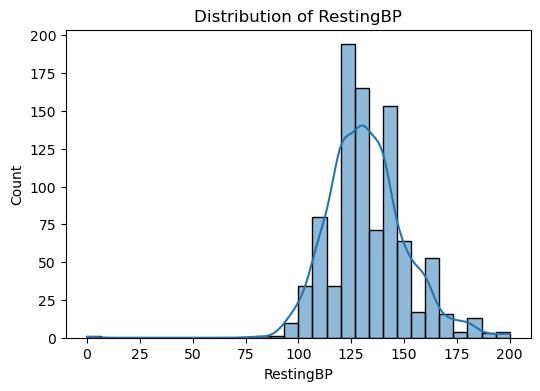

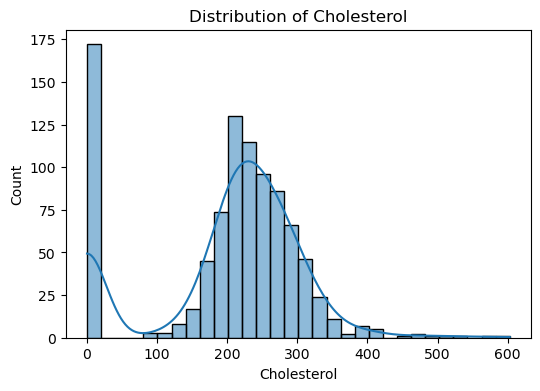

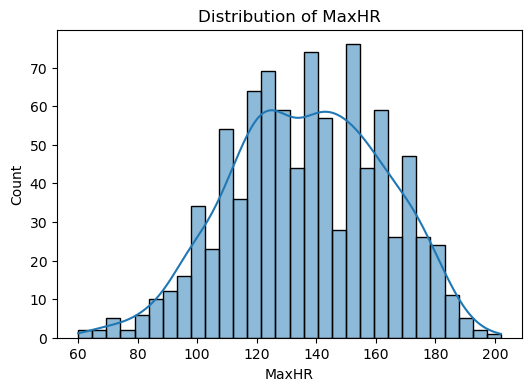

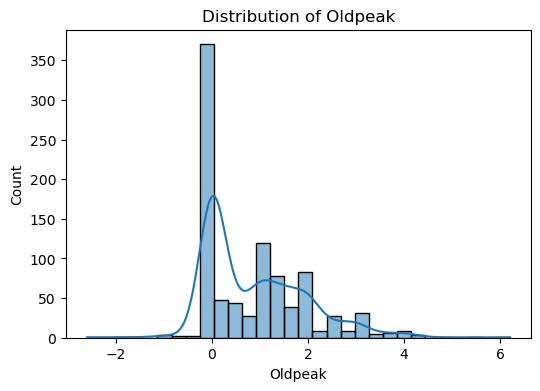

In [75]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f'Distribution of {col}')
    plt.show()

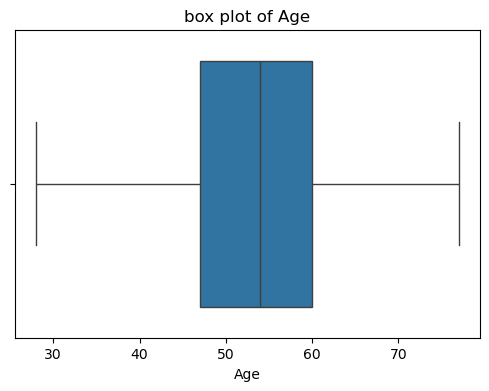

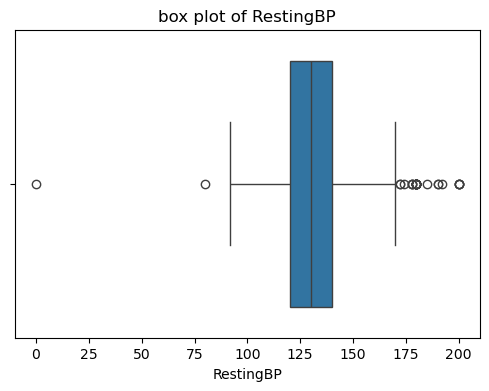

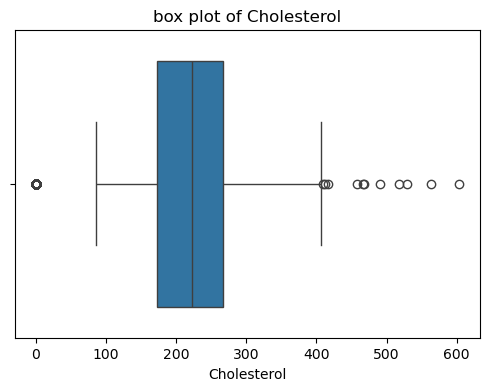

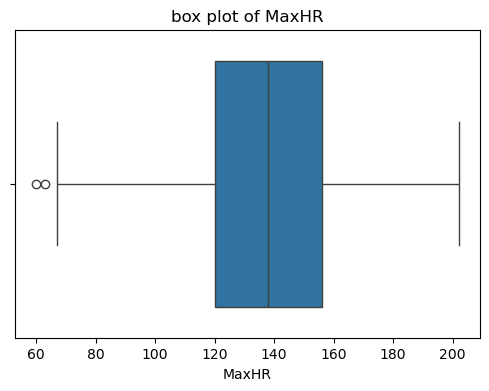

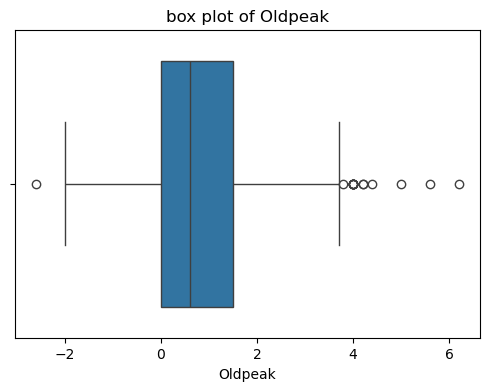

In [15]:
for col in numerical_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col])
    plt.title(f'box plot of {col}')
    plt.show()

In [17]:
def remove_outliers(df, columns):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 *IQR
        upper_bound = Q3 + 1.5 *IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df, numerical_cols)
print(df_cleaned)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

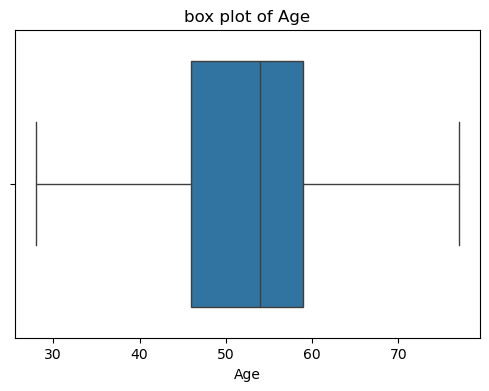

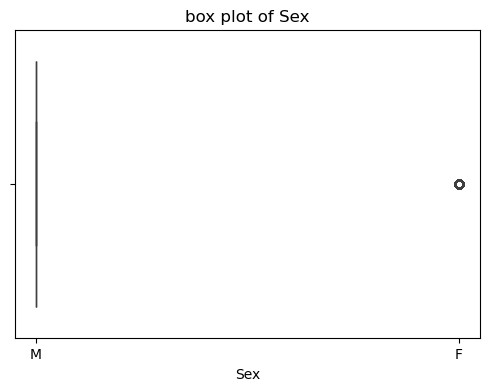

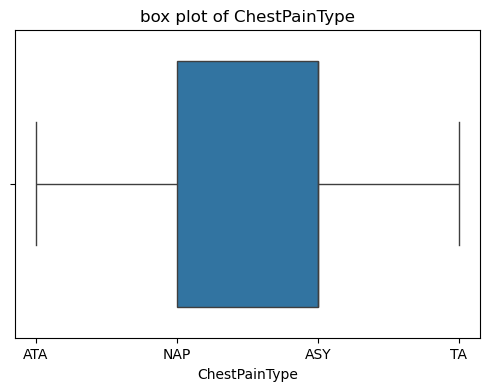

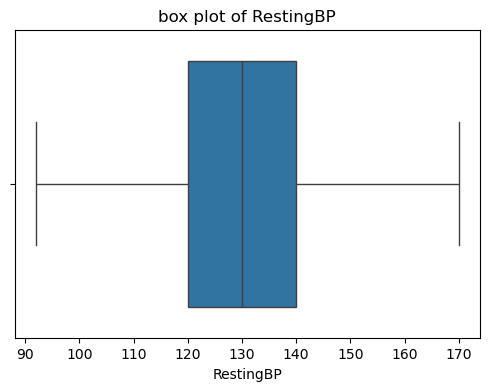

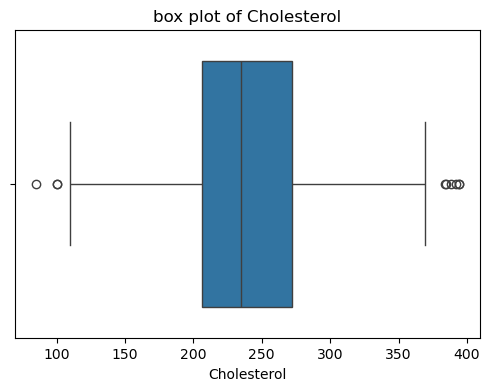

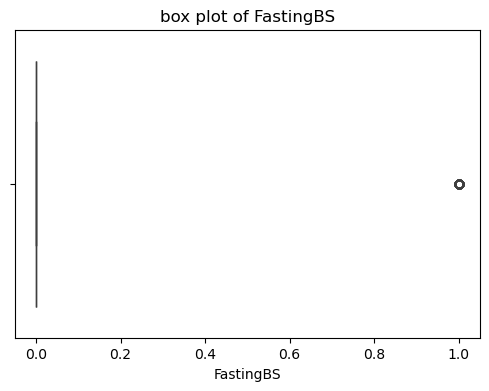

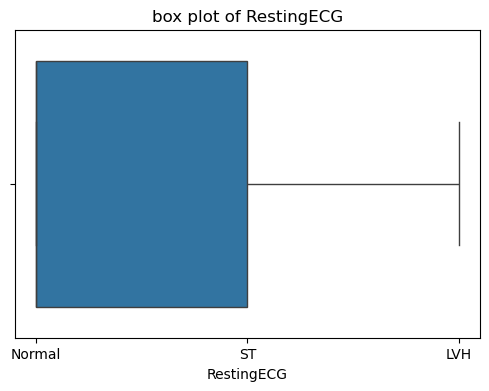

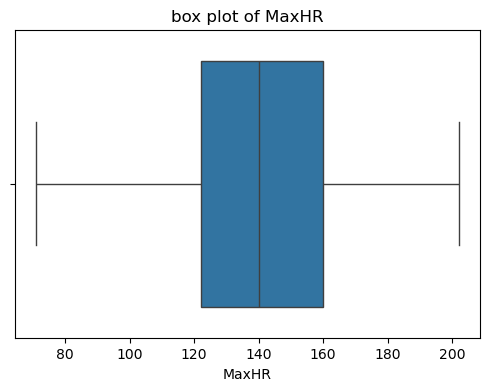

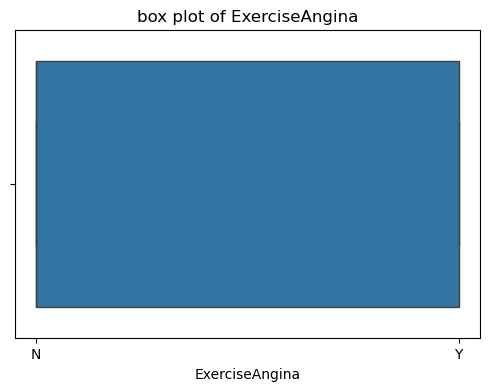

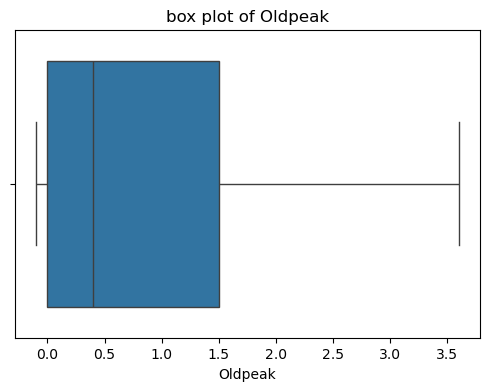

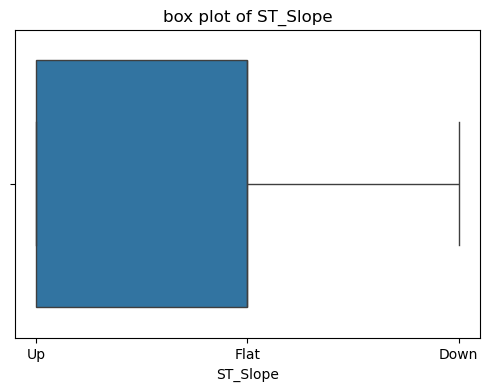

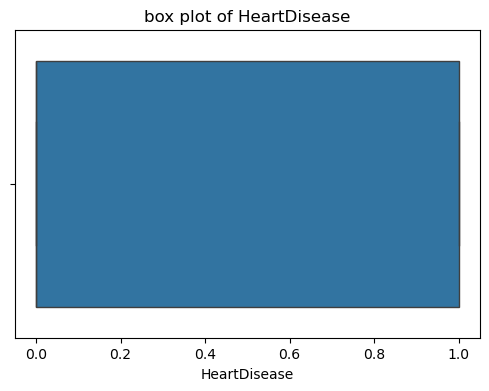

In [77]:
for col in df_cleaned:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df_cleaned[col])
    plt.title(f'box plot of {col}')
    plt.show()

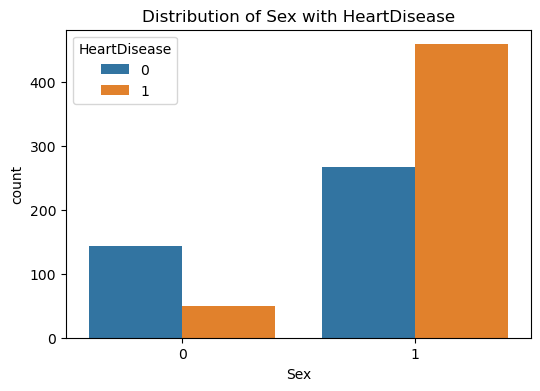

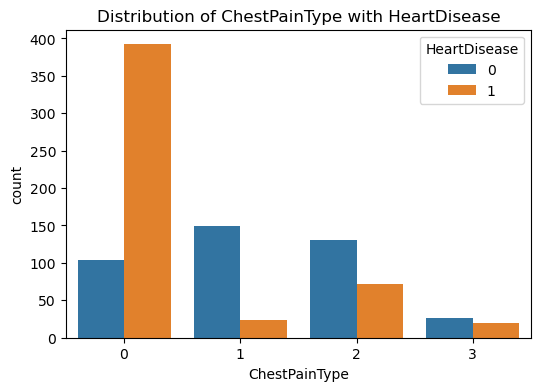

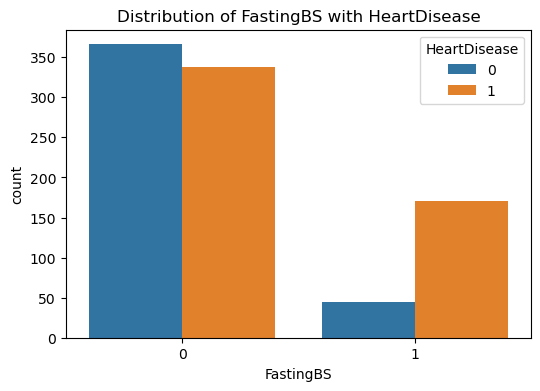

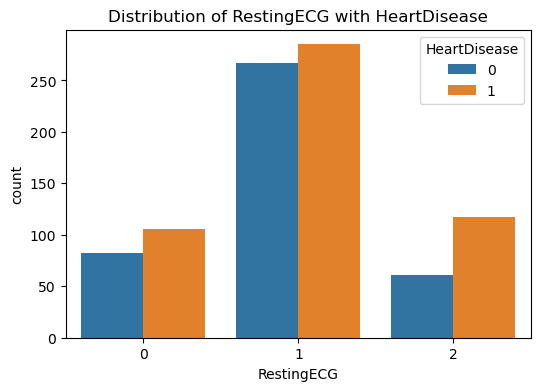

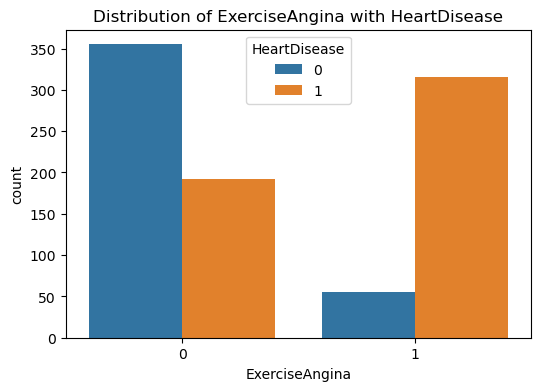

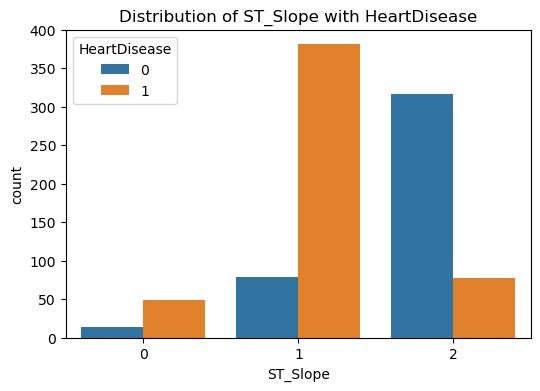

In [61]:
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(df, x = col, hue = 'HeartDisease')
    plt.title(f'Distribution of {col} with HeartDisease')
    plt.show()

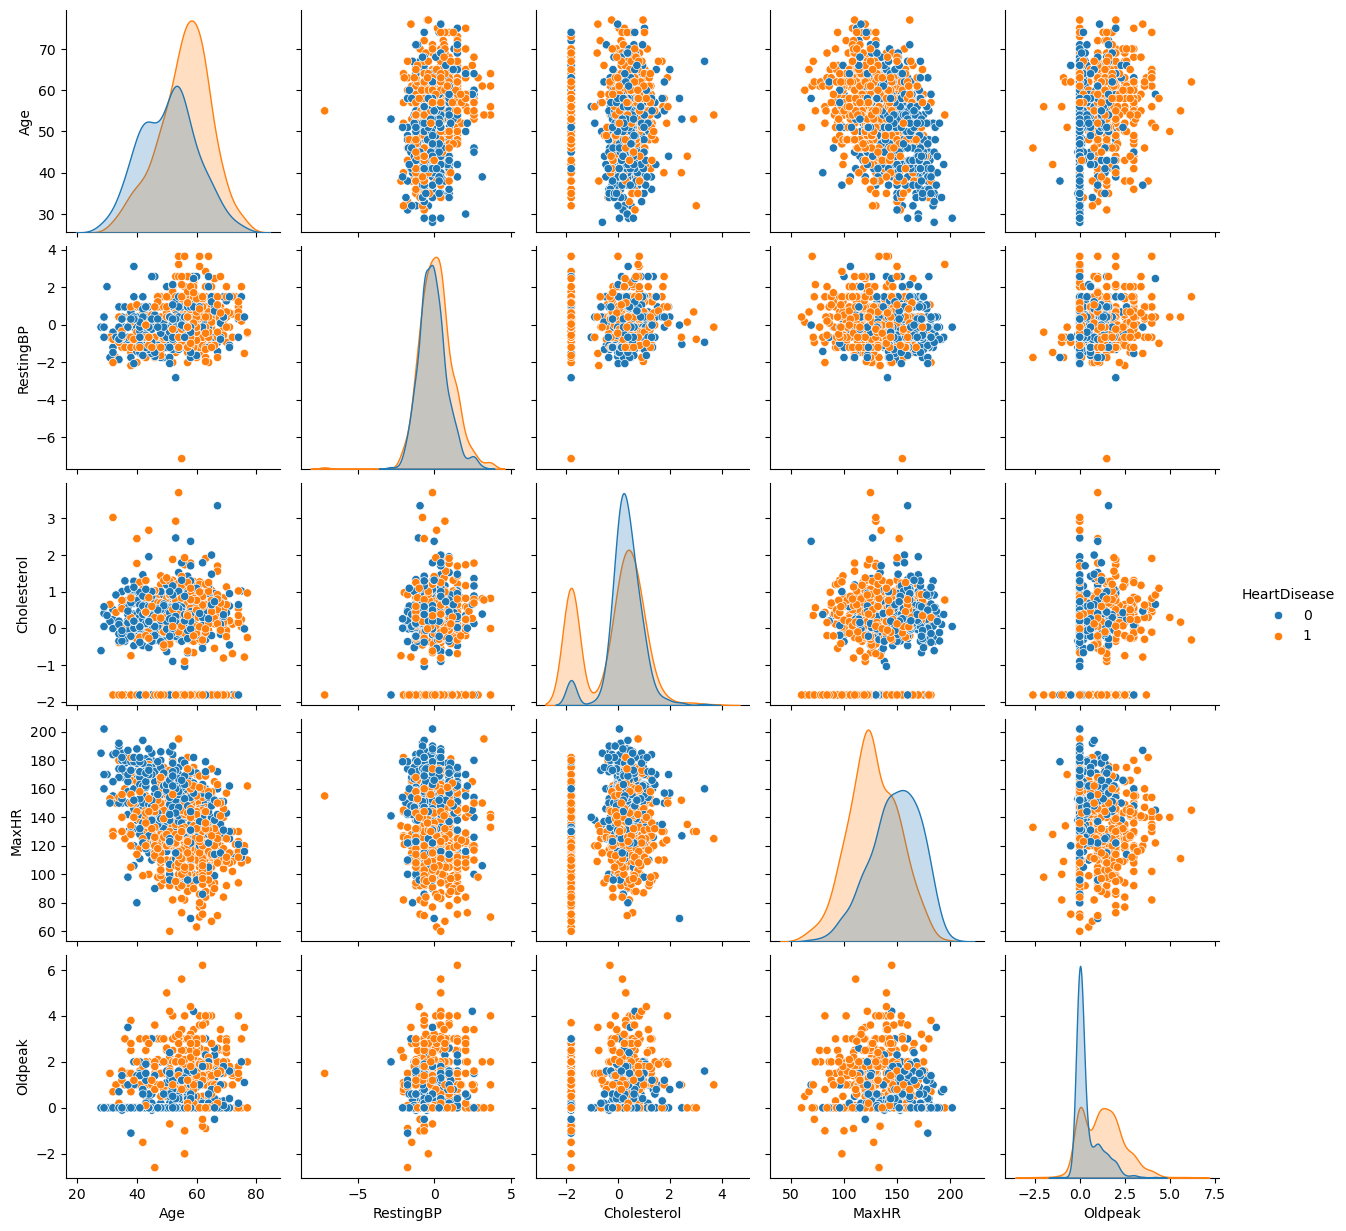

In [63]:
sns.pairplot(df, hue='HeartDisease', vars=numerical_cols)
plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [108]:
label_encode = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_cols:
    df_cleaned[col] = label_encode.fit_transform(df_cleaned[col])

In [110]:
df_cleaned.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

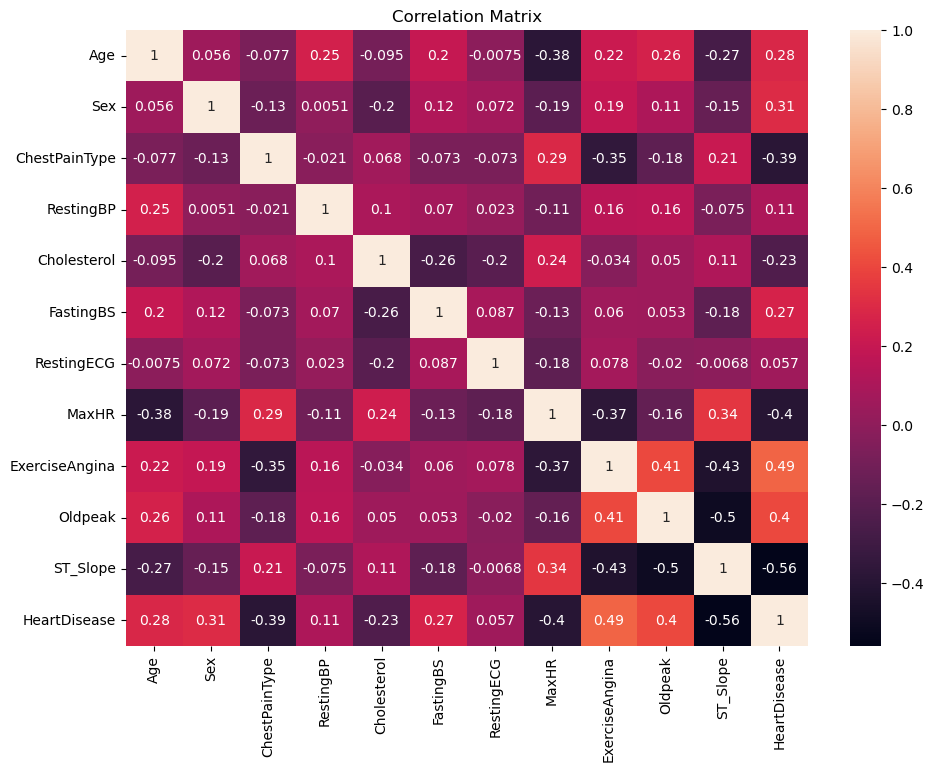

In [83]:
corr_matrix = df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix")
plt.show()

In [85]:
##list of independ and target
corr_matrix = df.corr()
target_variable = 'HeartDisease'
correlation_with_target = corr_matrix[target_variable].drop(target_variable)
threshold = 0.3

# Filter variables based on threshold
independent_variables = correlation_with_target[
    (correlation_with_target.abs() > threshold)
].index.tolist()

In [87]:
print("Target Variable:", target_variable)
print("Independent Variables:", independent_variables)

Target Variable: HeartDisease
Independent Variables: ['Sex', 'ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [112]:
X=df_cleaned.drop('HeartDisease',axis=1)
y=df_cleaned['HeartDisease']

In [114]:
print(X.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
dtype: object


In [132]:
scaler = StandardScaler()
columns_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1   0.548422     0.984547          0           1   
1     49    0              2   1.845686    -1.182352          0           1   
2     37    1              1  -0.100209     0.865268          0           2   
3     48    0              0   0.418696    -0.506439          0           1   
4     54    1              2   1.197054    -0.884155          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3  -1.397473     0.487552          0           1   
914   68    1              0   0.807875    -0.923915          1           1   
915   57    1              0  -0.100209    -2.156463          0           1   
916   57    0              1  -0.100209    -0.069083          0           0   
917   38    1              2   0.418696    -1.281751          0           1   

        MaxHR  ExerciseAngina  Oldpeak  ST_Slope  


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
model = RandomForestClassifier()

In [138]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [140]:
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train)

In [142]:
test_accuracy = accuracy_score(y_test, y_predTest)
train_accuracy = accuracy_score(y_train, y_predTrain)
print(test_accuracy*100)
print(train_accuracy*100)

90.78014184397163
100.0


In [86]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[61  6]
 [ 5 69]]


In [146]:
classifier = DecisionTreeClassifier()

In [148]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5303914835164835, 0.9666666666666667, 'x[10] <= 1.5\ngini = 0.494\nsamples = 560\nvalue = [310, 250]'),
 Text(0.27899332810047095, 0.9, 'x[2] <= 0.5\ngini = 0.364\nsamples = 280\nvalue = [67, 213]'),
 Text(0.4046924058084772, 0.9333333333333333, 'True  '),
 Text(0.12627551020408162, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.224\nsamples = 187\nvalue = [24.0, 163.0]'),
 Text(0.05023547880690738, 0.7666666666666667, 'x[0] <= 53.5\ngini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(0.02511773940345369, 0.7, 'x[9] <= 1.1\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.012558869701726845, 0.6333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.03767660910518053, 0.6333333333333333, 'x[0] <= 51.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.02511773940345369, 0.5666666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.05023547880690738, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07535321821036106, 0.7, 'x[4] 

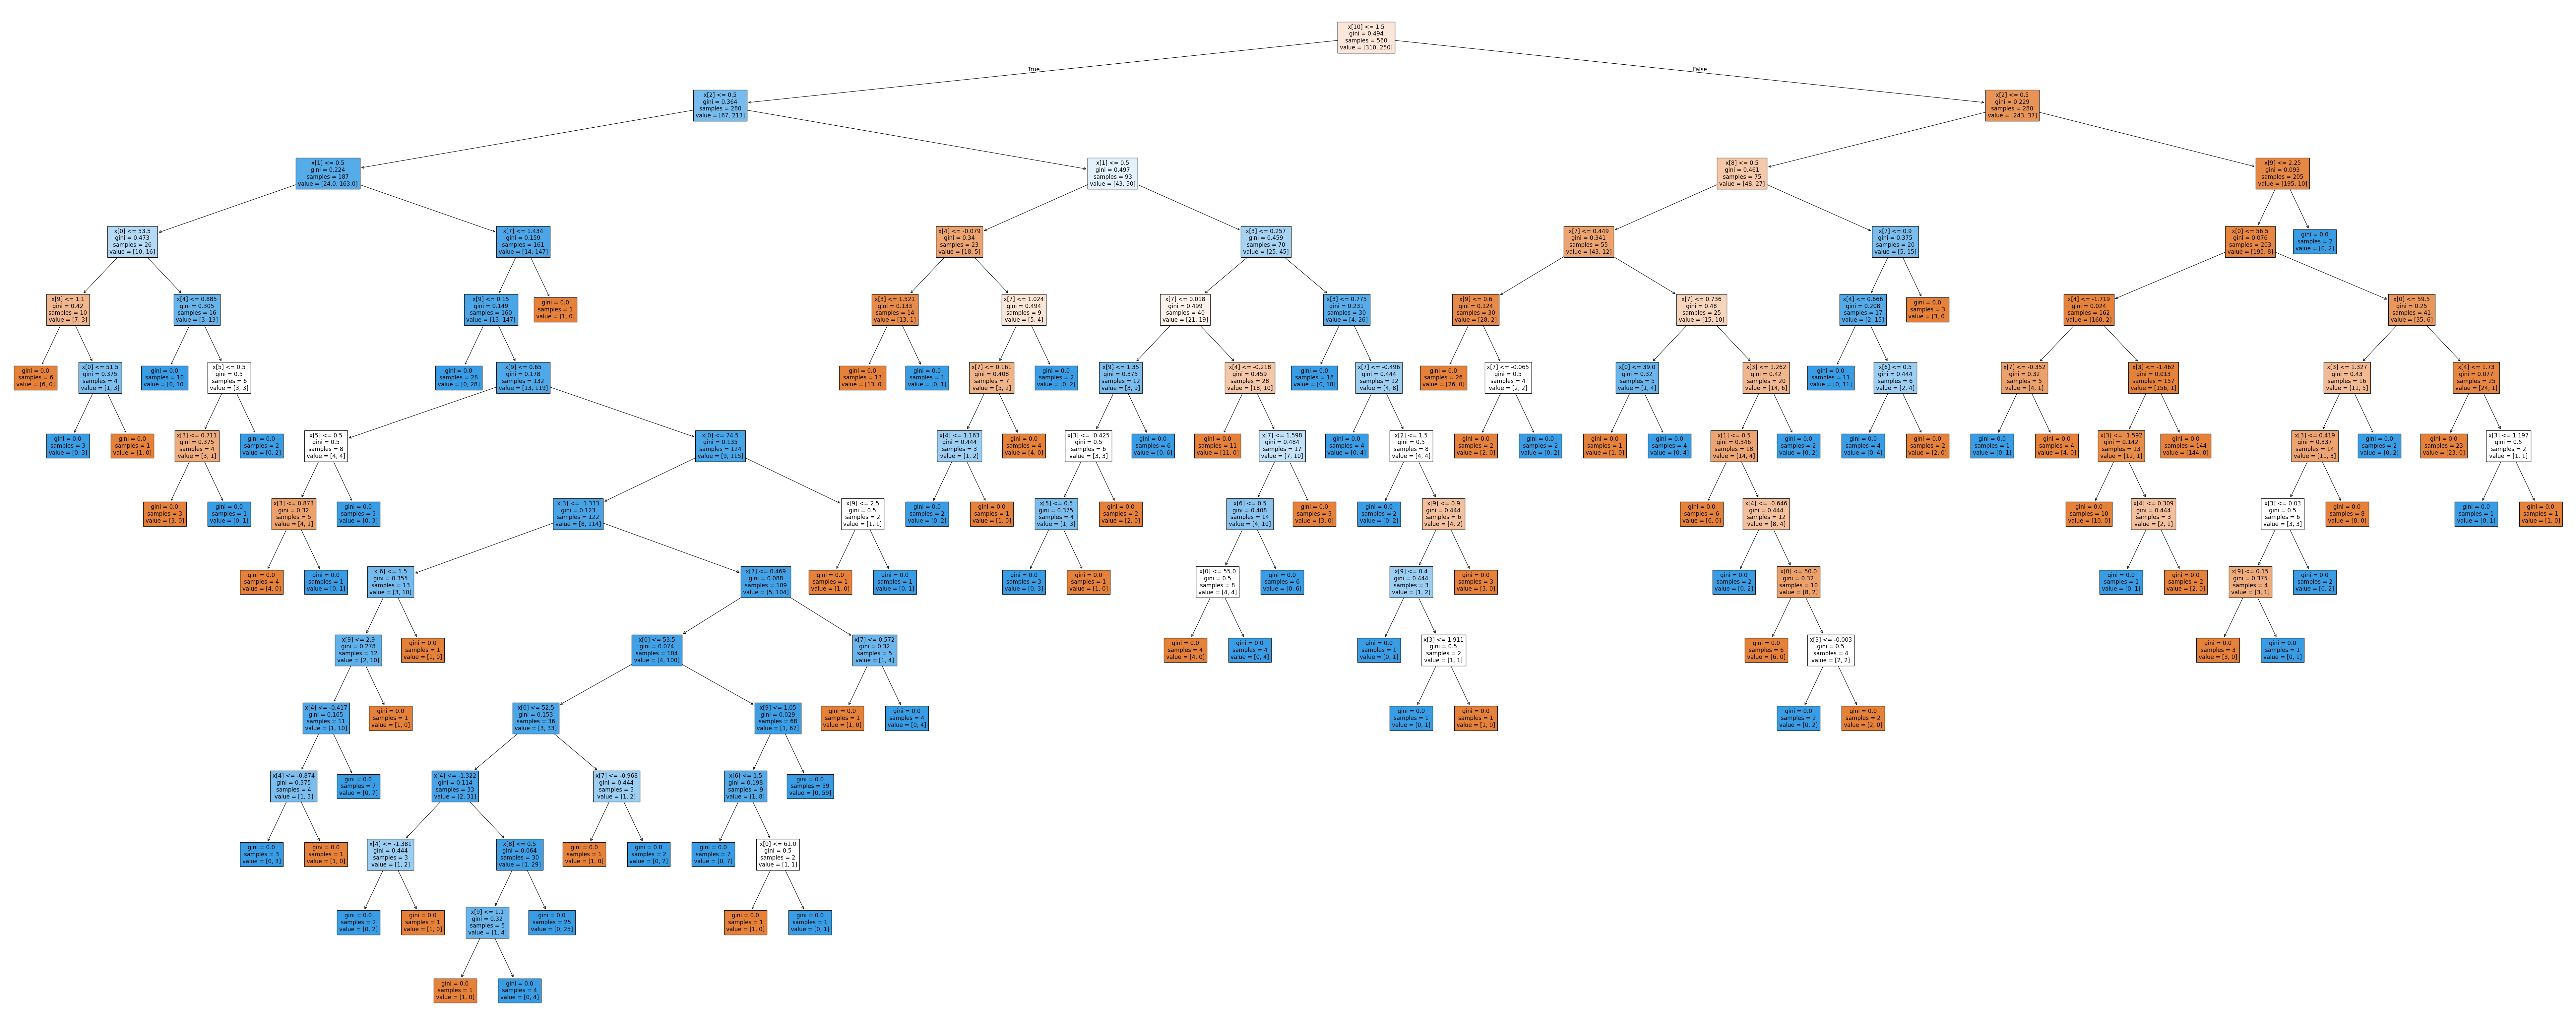

In [150]:
from sklearn import tree
plt.figure(figsize=(100, 40))
tree.plot_tree(classifier, filled = True)

In [151]:
y_pred = classifier.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

81.56028368794325


In [170]:
##xg boost
!pip install xgboost

In [172]:
import xgboost as xgb

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [198]:
accuracy = accuracy_score(y_test, y_pred_labels)
print(accuracy*100)

87.94326241134752


In [209]:
import numpy as np

# Example input for a normal person (no heart disease)

# Numerical values
age = 45
sex = 1  # Male (1 for male, 0 for female)
cp = 1  # Chest Pain Type (1 for typical angina, etc.)
trestbps = 120
chol = 220
fbs = 0  # Fasting Blood Sugar (0 for false, 1 for true)
restecg = 0  # Resting ECG (0 for normal, 1 for ST-T wave abnormality, 2 for left ventricular hypertrophy)
thalach = 170
exang = 0  # Exercise Angina (0 for no, 1 for yes)
oldpeak = 0.5
slope = 2  # ST Slope (0 for upsloping, 1 for flat, 2 for downsloping)
ca = 0  # Number of major vessels colored by fluoroscopy (0 to 3)
thal = 1  # Thalassemia (1 for normal, 2 for fixed defect, 3 for reversable defect)

# Create the input array with 11 features
input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope]])

# Predict using the trained XGBoost model
prediction = model.predict(input_data)

# Print the result
if prediction == 1:
    print("Prediction: Heart Disease Detected")
else:
    print("Prediction: No Heart Disease Detected")


Prediction: No Heart Disease Detected


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
